Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Plaksin Anton"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

def prod(it):
    acc = 1
    for x in it:
        acc *= x
    return acc

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """

        def LagIn(j, x):
            return prod((x - self.xk[m]) / (self.xk[j] - self.xk[m])
                for m in range(len(self.xk)) if m != j)

        return sum(self.yk[j] * LagIn(j, x) for j in range(len(self.xk)))

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


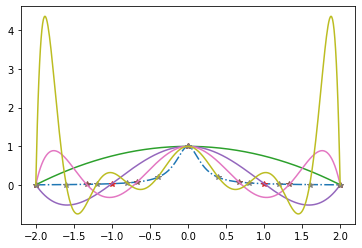

In [4]:
import matplotlib.pyplot as plt

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), '-.')

for m in [3, 5, 7, 11]:
    xs = np.linspace(-2, 2, m)
    ys = runge_func(xs)
    lp = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, '*')
    plt.plot(xs0, lp(xs0))

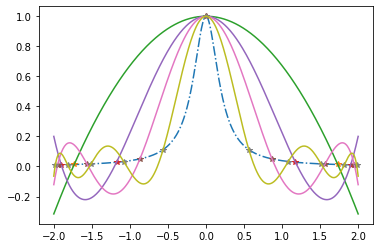

In [5]:
def chebyshevs(a, b, n):
    return (a + b) / 2 + (b - a) / 2 * np.cos(np.pi * (2 * np.arange(0, n, 1) + 1) / (2 * n))

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), '-.')

for m in [3, 5, 7, 11]:
    xs = chebyshevs(-2, 2, m)
    ys = runge_func(xs)
    lp = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, '*')
    plt.plot(xs0, lp(xs0))